In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('GoodReads_100k_books.csv')

In [3]:
df

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156


In [4]:
df['pages'] = df['pages'].apply(lambda x: np.nan if x == 0 else x)
df['rating'] = df['rating'].apply(lambda x: np.nan if x == 0 else x)

In [17]:
df.isnull().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages            7752
rating           1562
reviews             0
title               1
totalratings        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        100000 non-null  object 
 1   bookformat    96772 non-null   object 
 2   desc          93228 non-null   object 
 3   genre         89533 non-null   object 
 4   img           96955 non-null   object 
 5   isbn          85518 non-null   object 
 6   isbn13        88565 non-null   object 
 7   link          100000 non-null  object 
 8   pages         92248 non-null   float64
 9   rating        98438 non-null   float64
 10  reviews       100000 non-null  int64  
 11  title         99999 non-null   object 
 12  totalratings  100000 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


<AxesSubplot:>

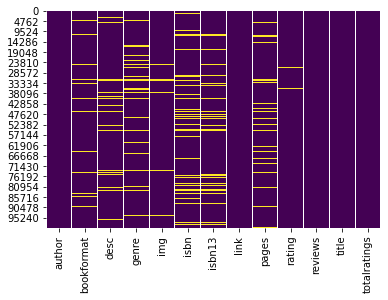

In [19]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

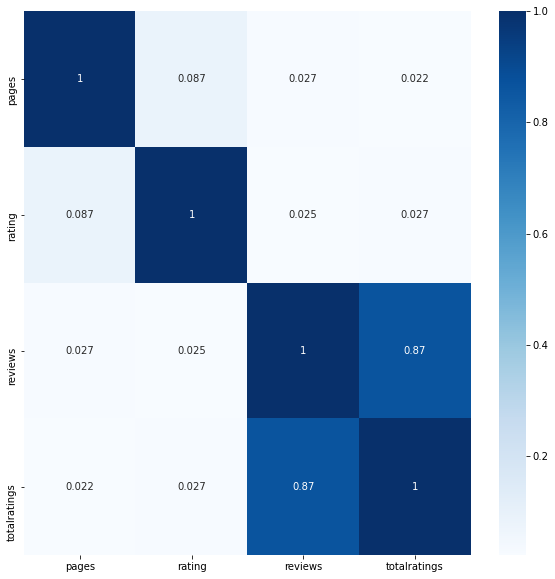

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [25]:
genres = dict()

g_df = df.loc[~df['genre'].isnull()]
for _, row in g_df.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        if g not in genres:
            genres[g] = 0
        genres[g] += 1

In [6]:
print("Number of existing genres: ", len(genres.keys()))

Number of existing genres:  1182


In [13]:
print("Number of existing bookformats: ", len(df.bookformat.unique()))

Number of existing bookformats:  203


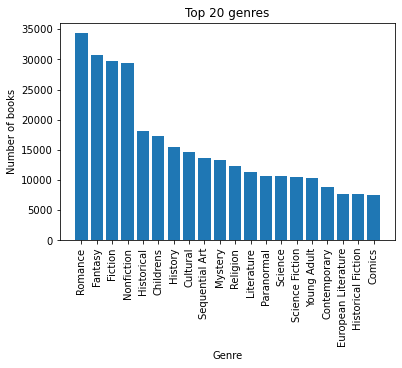

In [7]:
from collections import Counter
top_20_genres = dict(Counter(genres).most_common(20))

plt.title("Top 20 genres")
plt.xlabel("Genre")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.bar(list(top_20_genres.keys()), list(top_20_genres.values()))
plt.show()

In [8]:
genre_df = pd.DataFrame(data=list(top_20_genres.keys()), columns=["genre"])
genre_df

,genre
0,Romance
1,Fantasy
2,Fiction
3,Nonfiction
4,Historical
5,Childrens
6,History
7,Cultural
8,Sequential Art
9,Mystery


In [9]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []

temp = df.loc[~df['genre'].isnull()]

for genre in top_20_genres.keys():
    ratings = []
    totalratings = []
    reviews = []
    for _, row in temp.iterrows():
        if genre in row['genre'].split(','):
            ratings.append(row['rating'])
            totalratings.append(row['totalratings'])
            reviews.append(row['reviews'])
    avg_ratings.append(np.nanmean(ratings))
    avg_totalratings.append(np.nanmean(totalratings))
    avg_reviews.append(np.nanmean(reviews))

In [10]:
genre_df['avg_rating'] = avg_ratings
genre_df['avg_totalratings'] = avg_totalratings
genre_df['avg_review'] = avg_reviews
genre_df

,genre,avg_rating,avg_totalratings,avg_review
0,Romance,3.842893,6114.133578,407.258696
1,Fantasy,3.894474,8500.125808,448.515498
2,Fiction,3.858044,8121.127089,473.949064
3,Nonfiction,3.950623,1435.268525,99.650003
4,Historical,3.863913,5143.318851,349.689157
5,Childrens,3.918206,5080.746153,232.403154
6,History,3.937122,1340.419204,94.447186
7,Cultural,3.885077,2711.244994,198.566294
8,Sequential Art,3.968662,1905.941214,91.669685
9,Mystery,3.853631,7941.955075,510.073215


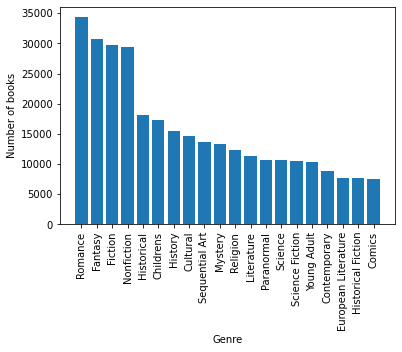

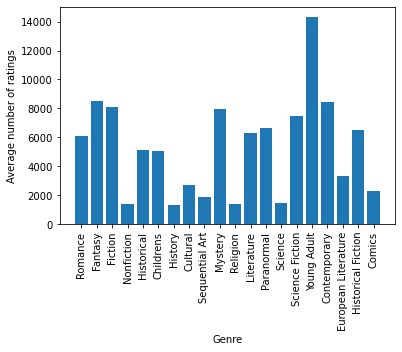

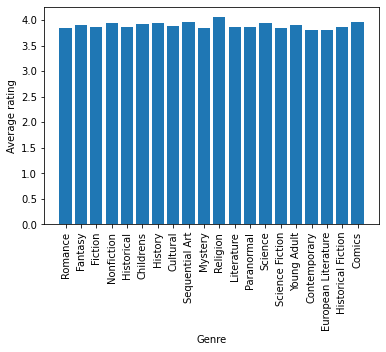

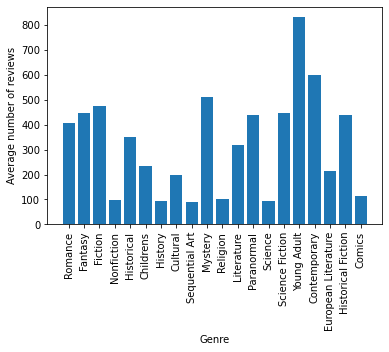

In [11]:
labels = ["Number of books", "Average number of ratings", "Average rating", "Average number of reviews"]
values = [list(top_20_genres.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.xlabel("Genre")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_20_genres.keys()), values[i])
    plt.show()

In [23]:
top_5_bookformats = dict(Counter(dict(df.bookformat.value_counts())).most_common(5))

In [24]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []

for bf in top_5_bookformats.keys():
    temp = df.loc[df['bookformat'] == bf]
    avg_ratings.append(temp['rating'].mean())
    avg_totalratings.append(temp['totalratings'].mean())
    avg_reviews.append(temp['reviews'].mean())

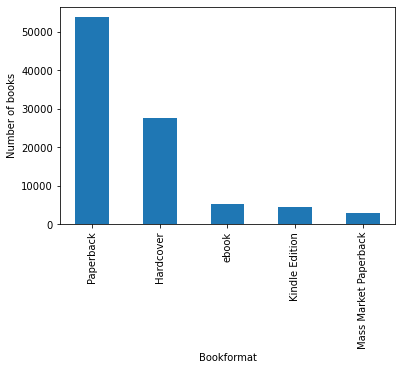

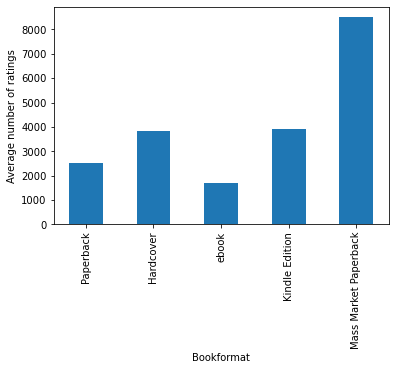

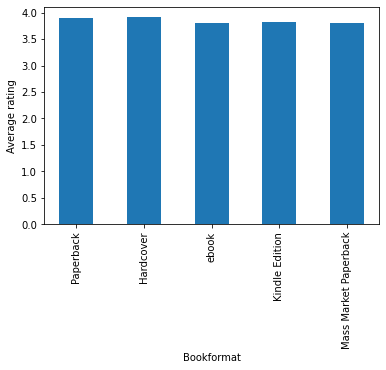

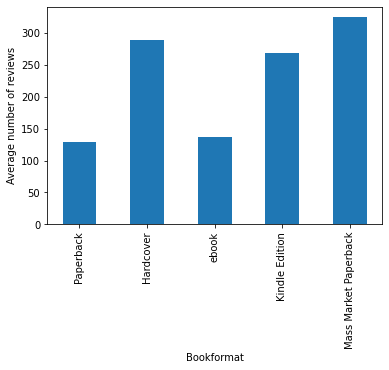

In [26]:
labels = ["Number of books", "Average number of ratings", "Average rating", "Average number of reviews"]
values = [list(top_5_bookformats.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.xlabel("Bookformat")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_5_bookformats.keys()), values[i], width=0.5)
    plt.show()

In [33]:
top_20_reviews = df.sort_values(by='reviews', ascending=False)[:20]

In [36]:
book_title = []
rating = []
totalratings = []
reviews = []

for _, row in top_20_reviews.iterrows():
    book_title.append(row['title'])
    rating.append(row['rating'])
    totalratings.append(row['totalratings'])
    reviews.append(row['reviews'])

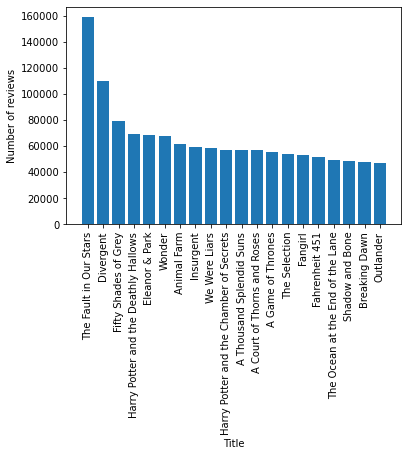

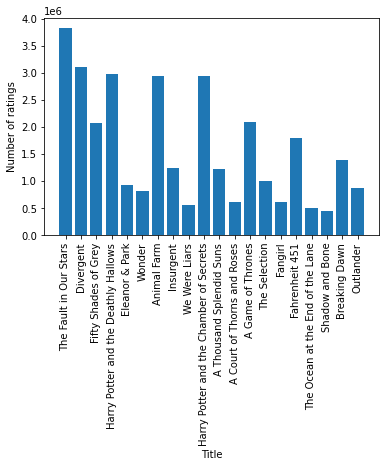

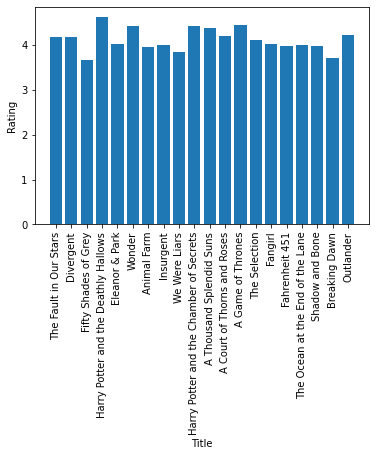

In [37]:
labels = ["Number of reviews", "Number of ratings", "Rating"]
values = [reviews, totalratings, rating]
for i in range(3):
    plt.xlabel("Title")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(book_title, values[i], width=0.8)
    plt.show()

In [43]:
top_20_ratings = df.sort_values(by='totalratings', ascending=False)[:20]

In [44]:
book_title = []
rating = []
totalratings = []
reviews = []

for _, row in top_20_ratings.iterrows():
    book_title.append(row['title'])
    rating.append(row['rating'])
    totalratings.append(row['totalratings'])
    reviews.append(row['reviews'])

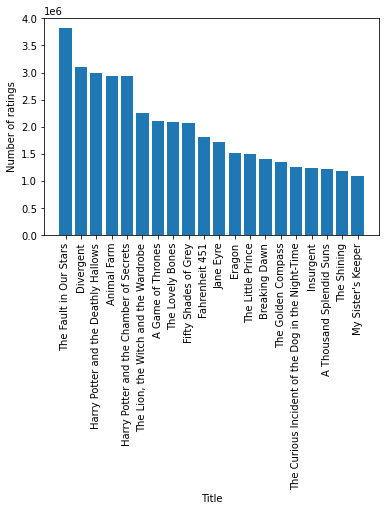

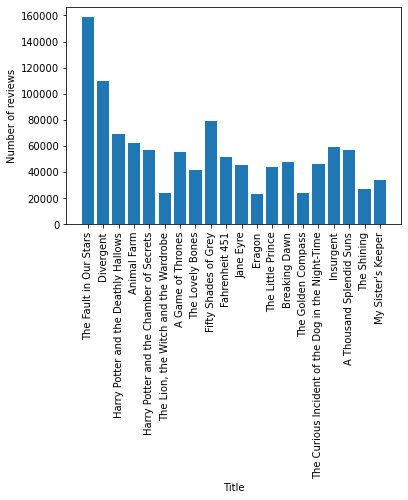

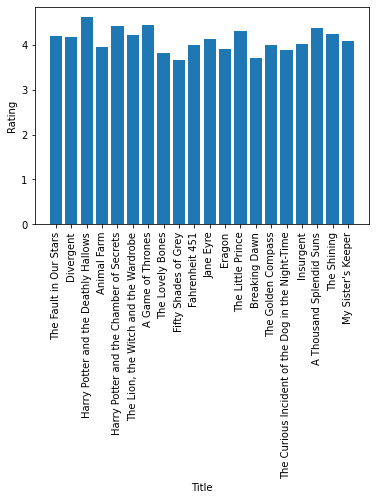

In [45]:
labels = ["Number of ratings", "Number of reviews", "Rating"]
values = [totalratings, reviews, rating]
for i in range(3):
    plt.xlabel("Title")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(book_title, values[i], width=0.8)
    plt.show()

In [49]:
top_20_author = dict(Counter(dict(df.author.value_counts())).most_common(20))

In [54]:
top_20_author

{'Mi-Ri Hwang': 137,
 'Willy Vandersteen': 76,
 'Yu-Rang Han': 75,
 'R.L. Stine': 75,
 'Elinor M. Brent-Dyer': 63,
 'Lynn Hagen': 62,
 'Anonymous': 61,
 "Louis L'Amour": 57,
 'Lynne Graham': 55,
 'Agatha Christie': 54,
 'Joyee Flynn': 53,
 'Bonnie Bryant': 48,
 'Harry Turtledove': 46,
 'Zane Grey': 45,
 'Jim Davis': 43,
 'Piers Anthony': 43,
 'Humayun Ahmed': 42,
 'H.P. Lovecraft': 41,
 'Gabrielle Evans': 39,
 'Kristen Ashley': 38}

In [57]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []

for author in top_20_author.keys():
    temp = df.loc[df['author'] == author]
    avg_ratings.append(temp['rating'].mean())
    avg_totalratings.append(temp['totalratings'].mean())
    avg_reviews.append(temp['reviews'].mean())

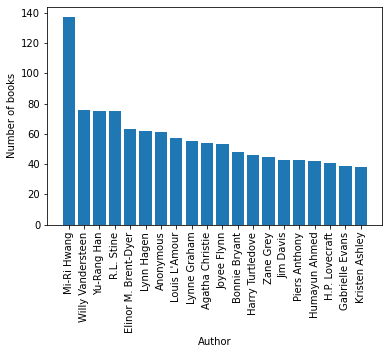

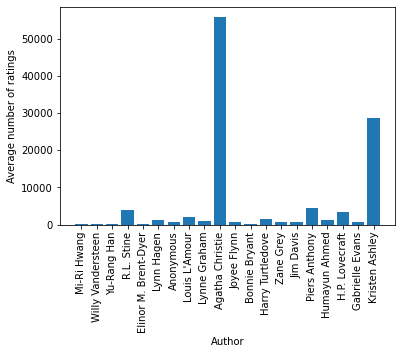

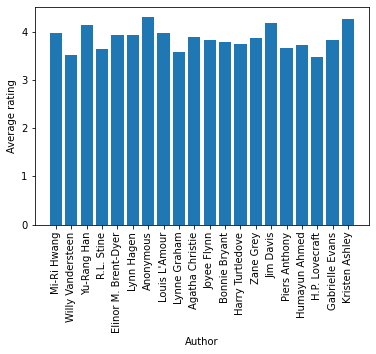

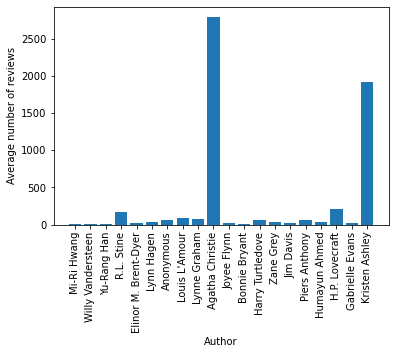

In [58]:
labels = ["Number of books", "Average number of ratings", "Average rating", "Average number of reviews"]
values = [list(top_20_author.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.xlabel("Author")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_20_author.keys()), values[i])
    plt.show()

In [61]:
df.describe().round(2)

,pages,rating,reviews,totalratings
count,92248.00,98438.00,100000.00,100000.00
mean,276.44,3.89,181.53,2990.76
std,375.25,0.39,1449.45,36353.38
min,1.00,1.00,0.00,0.00
25%,164.00,3.67,3.00,31.00
50%,255.00,3.92,15.00,146.00
75%,346.00,4.14,67.00,744.00
max,70000.00,5.00,158776.00,3819326.00


In [6]:
sum = 0
for i in df.itertuples():
    sum += i[11]
sum

18152845

array([[<AxesSubplot:title={'center':'pages'}>]], dtype=object)

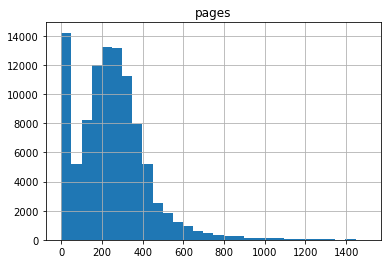

In [22]:
df.loc[df['pages'] < 1500].hist(column="pages", bins=30)

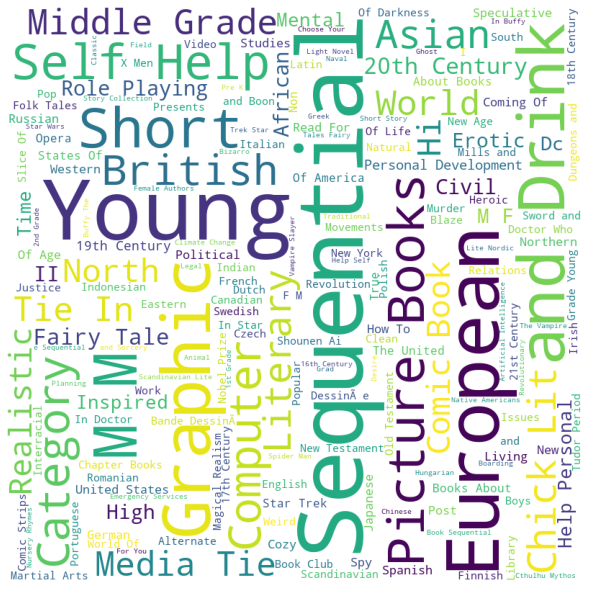

In [27]:
comment_words = ''

g_df = df.loc[~df['genre'].isnull()]
for _, row in g_df.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        g.replace(" ", "")
    comment_words += " ".join(genre_list) + " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = genres.keys(),
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [5]:
len(df.author.unique())

68767